In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn.preprocessing import Normalizer
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

In [2]:
constituents=pd.read_csv("/data/dharp/compounding/datasets/words.csv")
constituents.columns=['joiner','context','decade','count']
constituents=constituents.query('decade != 2000')
constituents=constituents.groupby(['joiner','context'])['count'].sum()
display(constituents.shape)
constituents.head()

(26736070,)

joiner  context 
a_n     a_a          13026
        a_n         297659
        aa_n         15368
        aaa_n        10994
        aachen_n        40
Name: count, dtype: int64

In [3]:
compounds=pd.read_csv("/data/dharp/compounding/datasets/phrases.csv")
compounds.columns=['modifier','head','context','decade','count']
compounds=compounds.query('decade != 2000')
compounds['joiner']=compounds['modifier']+" "+compounds['head']
compounds=compounds.groupby(['joiner','context'])['count'].sum()
display(compounds.shape)
compounds.head()

(9190824,)

joiner      context    
----_n x_n  x_n            339
a_n a_n     professor_n    130
            walter_n        65
a_n aa_n    a_n             81
            aa_n           908
Name: count, dtype: int64

In [4]:
df=pd.concat([constituents,compounds])

In [5]:
df=df.to_sparse()

In [6]:
df, rows, columns = df.to_coo(row_levels=['joiner'],column_levels=['context'],sort_labels=False)

In [7]:
len(rows)

1383472

In [8]:
df_svd = TruncatedSVD(n_components=300, n_iter=10, random_state=1991)
display(df_svd.fit(df).explained_variance_ratio_.sum())
df_list=df_svd.fit(df).explained_variance_ratio_
df_reduced = df_svd.fit_transform(df)
df_reduced = Normalizer(copy=False).fit_transform(df_reduced)
df_reduced=pd.DataFrame(df_reduced,index=rows)
df_reduced.reset_index(inplace=True)
df_reduced

0.9960686347896631

,index,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,a_n,0.947,-0.216,-0.079,0.098,0.031,-0.129,-0.041,-0.053,0.022,...,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,aa_n,0.802,-0.201,-0.027,0.069,-0.026,-0.095,0.035,0.020,0.017,...,-0.014,-0.006,0.104,0.060,-0.048,0.022,0.034,-0.082,-0.009,-0.026
2,aaa_n,0.538,-0.114,0.006,0.054,-0.015,-0.046,0.012,0.015,-0.009,...,0.019,0.011,0.117,0.047,0.024,0.016,0.057,-0.078,0.033,-0.003
3,aaaa_n,0.006,0.002,0.000,-0.011,0.032,-0.009,-0.011,-0.002,0.004,...,-0.064,-0.018,0.271,0.101,-0.168,0.139,0.115,-0.188,0.010,-0.083
4,aaaaa_n,0.003,-0.003,-0.001,-0.000,0.020,-0.011,-0.007,-0.003,0.005,...,-0.081,-0.025,0.289,0.111,-0.174,0.167,0.120,-0.197,0.020,-0.085
5,aaai_n,0.069,0.067,0.018,-0.150,0.008,0.019,-0.034,-0.019,0.004,...,-0.041,-0.081,0.013,-0.075,-0.032,-0.036,-0.054,-0.026,0.034,-0.000
6,aab_n,0.650,-0.192,-0.045,0.075,-0.020,-0.153,0.073,0.050,-0.039,...,-0.028,-0.005,-0.064,0.012,0.007,0.039,-0.001,0.018,0.006,0.026
7,aac_n,0.768,-0.204,-0.045,0.052,-0.029,-0.154,0.082,0.060,-0.049,...,0.044,-0.016,-0.016,0.009,0.026,-0.025,-0.020,-0.045,-0.033,0.044
8,aaddison_n,0.009,0.006,0.001,-0.019,0.028,-0.005,-0.014,-0.006,0.003,...,-0.066,-0.040,-0.134,0.100,-0.003,0.009,0.028,-0.007,-0.016,0.078
9,aaf_n,0.066,0.061,0.021,-0.128,0.031,0.062,0.010,0.002,0.002,...,0.026,-0.023,-0.059,-0.010,-0.030,-0.060,-0.019,0.025,0.020,-0.005


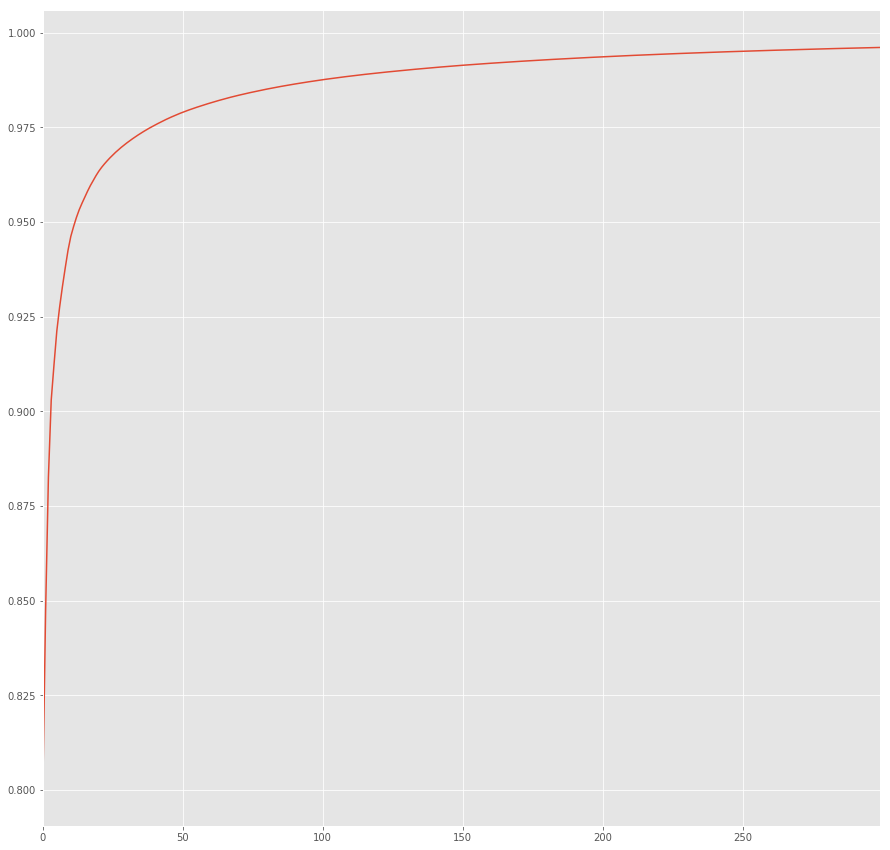

In [10]:
pd.Series(df_list).cumsum().plot(figsize=[15,15])

In [ ]:
dddd